In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import numpy as np

In [15]:
pd.read_csv("/content/drive/MyDrive/dl_data/data/ThoraricSurgery3.csv")
data_set=np.loadtxt("/content/drive/MyDrive/dl_data/data/ThoraricSurgery3.csv", delimiter=",")

In [16]:
data_set

array([[ 1.  ,  2.88,  2.16, ...,  0.  , 60.  ,  0.  ],
       [ 2.  ,  3.4 ,  1.88, ...,  0.  , 51.  ,  0.  ],
       [ 2.  ,  2.76,  2.08, ...,  0.  , 59.  ,  0.  ],
       ...,
       [ 2.  ,  3.04,  2.08, ...,  0.  , 52.  ,  0.  ],
       [ 2.  ,  1.96,  1.68, ...,  0.  , 79.  ,  0.  ],
       [ 2.  ,  4.72,  3.56, ...,  0.  , 51.  ,  0.  ]])

In [17]:
data_set.shape

(470, 17)

In [18]:
x=data_set[:,0:16]
y=data_set[:,16]

In [21]:
x
y

array([0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [22]:
from tensorflow.keras.models import Sequential  # 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.layers import Dense       # 데이터를 다루는데 필요한 라이브러리를 불러옵니다.

In [49]:
model = Sequential()

In [50]:
model.add(Dense(  32 ,input_dim=16,activation='relu'))
#16개의 특징값으로 구성된 470건의 데이터를 32개의 일반회화된 특징으로 표현한다
#32갖의 선(수평, 수직, 둥근...)
model.add(Dense(  8 ,activation='relu'))
#32개의 일반회된 특징을 압축갛여 8가지 특징으로 표연한다
#32가지 선의 조합으로 구성된 도형(사각형, 오각형, ...)

In [51]:
model.add(Dense(1, activation='sigmoid'))
#8가지 도형의 조합으로 표현된 형상(눈, 코, ...얼굴...)

In [52]:
model.summary() # 16*32+32, 32*1+1

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                544       
                                                                 
 dense_9 (Dense)             (None, 8)                 264       
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 817 (3.19 KB)
Trainable params: 817 (3.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
# 딥러닝 모델이란? 깊은 신경망(히든 계층이 2개 이상)으로 학습된
# 모델의 가중치 변수로 표현된 함수

In [54]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
list=model.fit(x, y, epochs=10, batch_size=20)

Epoch 1/10
24/24 [==============================] - 1s 2ms/step - loss: 0.5086 - accuracy: 0.8298
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8511
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.8511
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.4383 - accuracy: 0.8511
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.8511
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8511
Epoch 7/10
24/24 [==============================] - 0s 3ms/step - loss: 0.4273 - accuracy: 0.8511
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.8511
Epoch 9/10
24/24 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8511
Epoch 10/10
24/24 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8511


In [57]:

"""
데이터 : 470건
1 epoch : 470건의 데이터 전체에 대해 훈련(학습)이 진행
10 epoch : 470건의 데이터 전체에 대해 훈련(학습)이 10번 반복 진행
batch_size : 1번의 훈련(학습)에 사용되는 데이터의 건수
batch_size=20 : 1번의 훈련(학습)에 사용되는 데이터가 20건,
20건의 데이터에 대한 예측 결과와 실제 결과의 차이인 에러를 계산
-> 에러를 줄이기 위해 역전파를 1번 수행하면서 가중치가 업데이트
따라서 1 epoch(470건)에는 batch가 총 23번 일어남(학습이 23번 이뤄짐)
=> 역전파가 23번 수행됨
"""

'\n데이터 : 470건\n1 epoch : 470건의 데이터 전체에 대해 훈련(학습)이 진행\n10 epoch : 470건의 데이터 전체에 대해 훈련(학습)이 10번 반복 진행\nbatch_size : 1번의 훈련(학습)에 사용되는 데이터의 건수\nbatch_size=20 : 1번의 훈련(학습)에 사용되는 데이터가 20건,\n20건의 데이터에 대한 예측 결과와 실제 결과의 차이인 에러를 계산\n-> 에러를 줄이기 위해 역전파를 1번 수행하면서 가중치가 업데이트\n따라서 1 epoch(470건)에는 batch가 총 23번 일어남(학습이 23번 이뤄짐)\n=> 역전파가 23번 수행됨\n'

In [58]:
# 공부한 시간과 점수를 각각 x, y라는 이름의 넘파이 배열로 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [59]:
#x의 평균값을 구합니다.
mx = np.mean(x)

#y의 평균값을 구합니다.
my = np.mean(y)

# 출력으로 확인합니다.
print("x의 평균값:", mx)
print("y의 평균값:", my)

x의 평균값: 5.0
y의 평균값: 90.5


In [60]:
# 기울기 공식의 분모 부분입니다.
divisor = sum([(i - mx)**2 for i in x])

# 기울기 공식의 분자 부분입니다.
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)

# 출력으로 확인합니다.
print("분모:", divisor)
print("분자:", dividend)

분모: 20.0
분자: 46.0


In [61]:
# 기울기 a를 구하는 공식입니다.
a = dividend / divisor

# y절편 b 를 구하는 공식입니다.
b = my - (mx*a)

# 출력으로 확인합니다.
print("기울기 a =", a)
print("y절편 b =", b)

기울기 a = 2.3
y절편 b = 79.0


In [63]:
# y=ax + b에 가상의 a,b 값을 대입한 결과를 출력하는 함수입니다.
def predict(x):
    return a * x + b

# 예측 값이 들어갈 빈 리스트를 만듭니다.
predict_result = []

# 모든 x값을 한 번씩 대입하여 predict_result 리스트를 완성합니다.
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i])))

공부시간=2, 실제점수=81, 예측점수=84
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=93
공부시간=8, 실제점수=97, 예측점수=97


In [64]:
import matplotlib.pyplot as plt

In [67]:
x
y

array([81, 93, 91, 97])

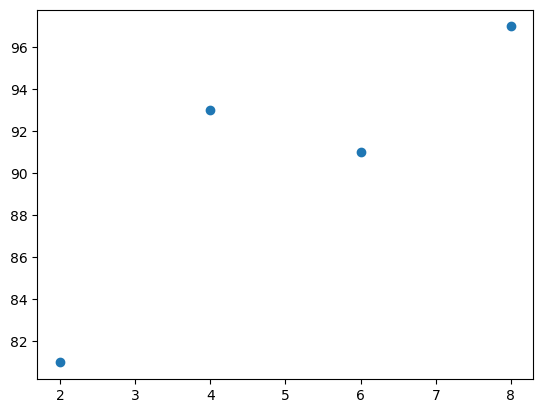

In [68]:
plt.scatter(x,y)

In [76]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a = 0
b = 0

In [77]:
#학습률을 정합니다.
lr = 0.01

In [78]:
#몇 번 반복될지를 설정합니다.
epochs = 2001

epoch=0, 기울기=2.3192, 절편=78.8853


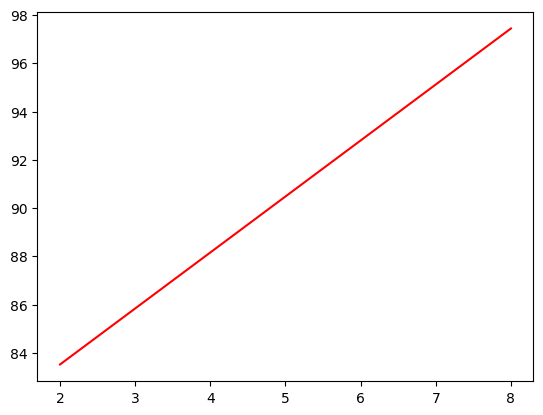

epoch=100, 기울기=2.3139, 절편=78.9171


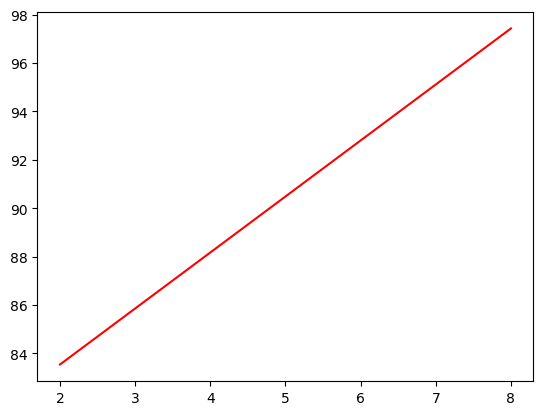

epoch=200, 기울기=2.3100, 절편=78.9401


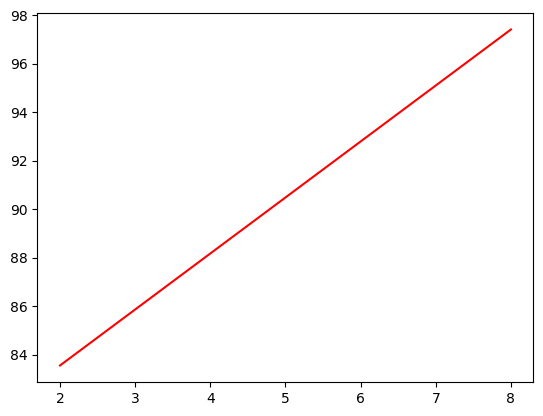

epoch=300, 기울기=2.3073, 절편=78.9567


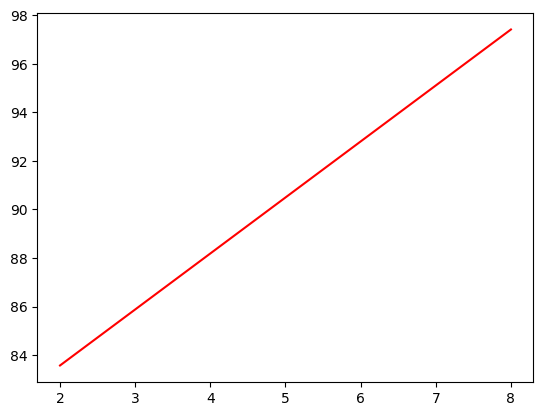

epoch=400, 기울기=2.3052, 절편=78.9687


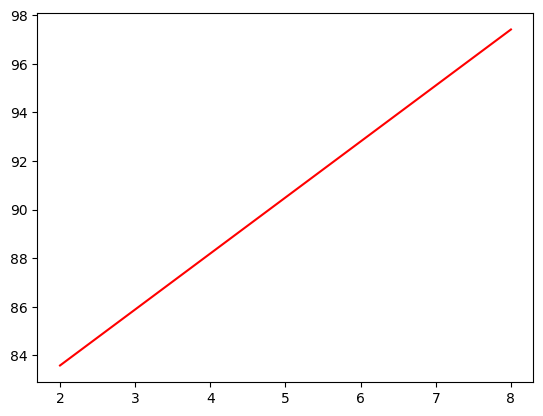

epoch=500, 기울기=2.3038, 절편=78.9774


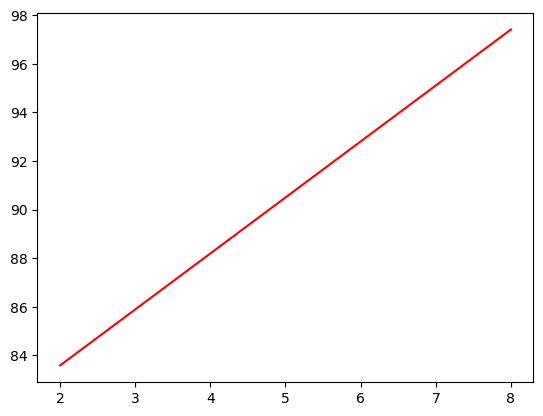

epoch=600, 기울기=2.3027, 절편=78.9837


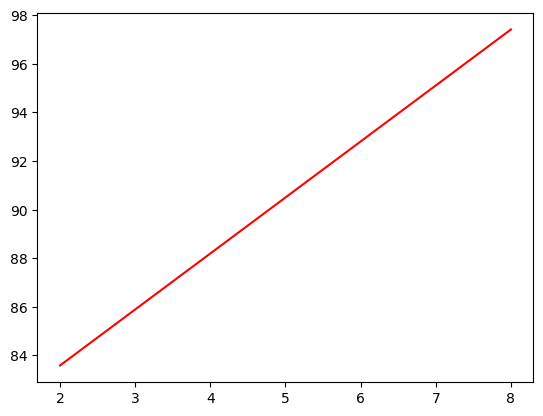

epoch=700, 기울기=2.3020, 절편=78.9882


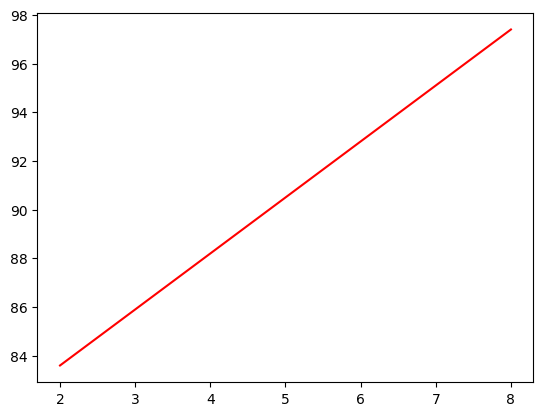

epoch=800, 기울기=2.3014, 절편=78.9915


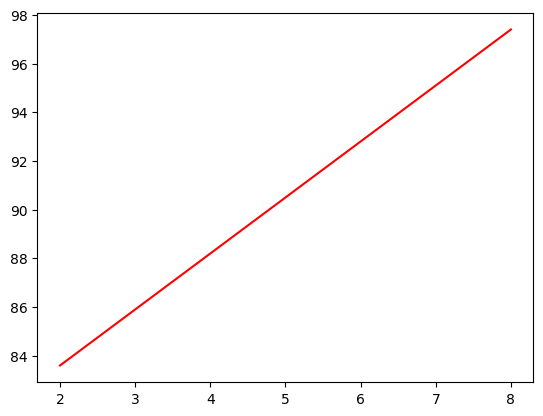

epoch=900, 기울기=2.3010, 절편=78.9938


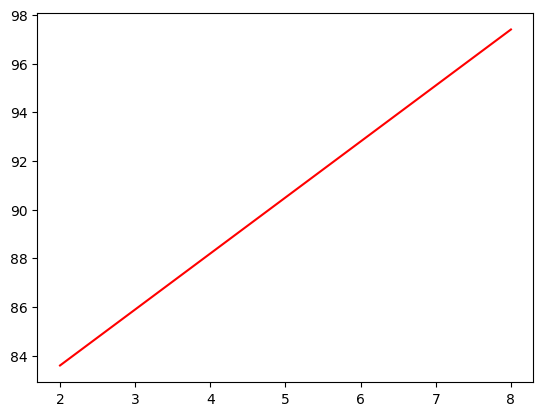

epoch=1000, 기울기=2.3007, 절편=78.9955


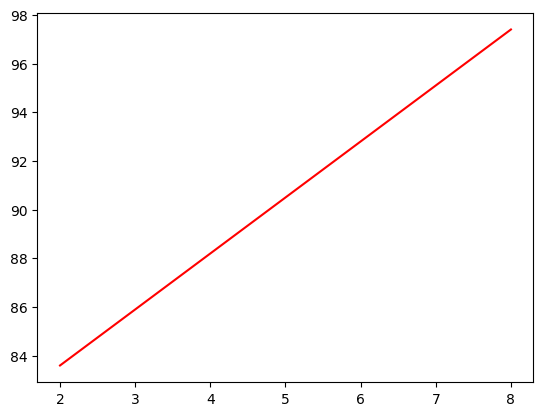

epoch=1100, 기울기=2.3005, 절편=78.9968


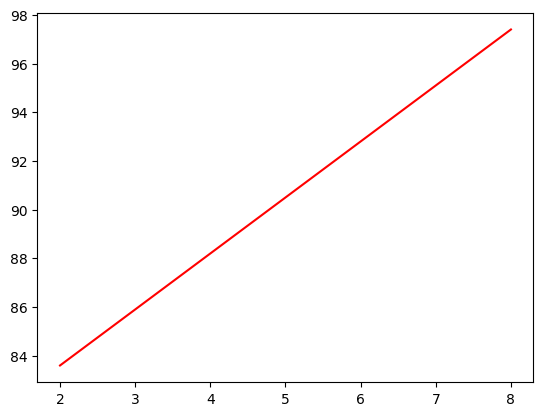

epoch=1200, 기울기=2.3004, 절편=78.9977


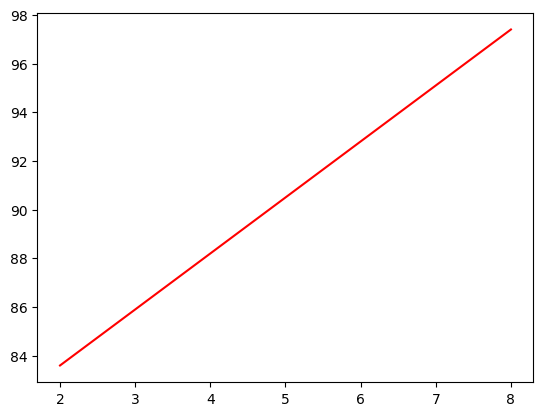

epoch=1300, 기울기=2.3003, 절편=78.9983


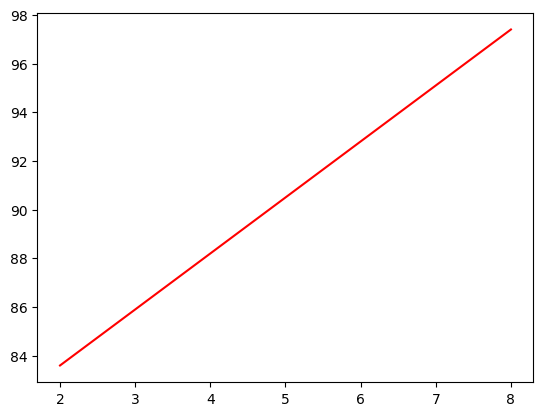

epoch=1400, 기울기=2.3002, 절편=78.9988


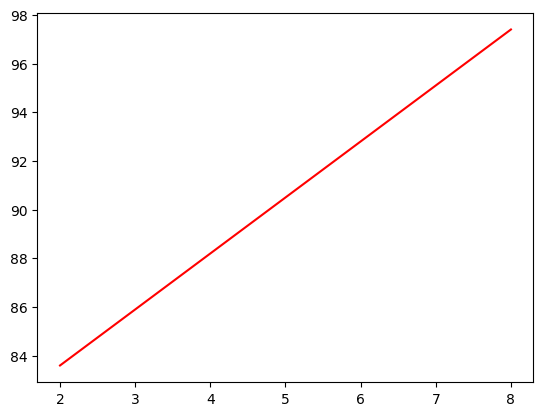

epoch=1500, 기울기=2.3001, 절편=78.9991


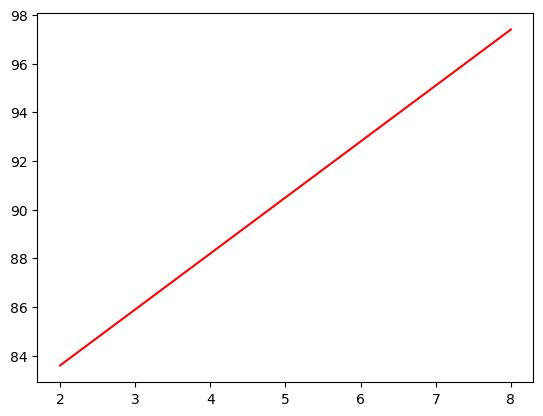

epoch=1600, 기울기=2.3001, 절편=78.9994


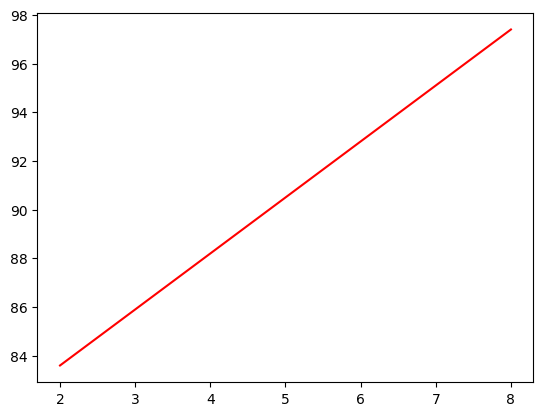

epoch=1700, 기울기=2.3001, 절편=78.9995


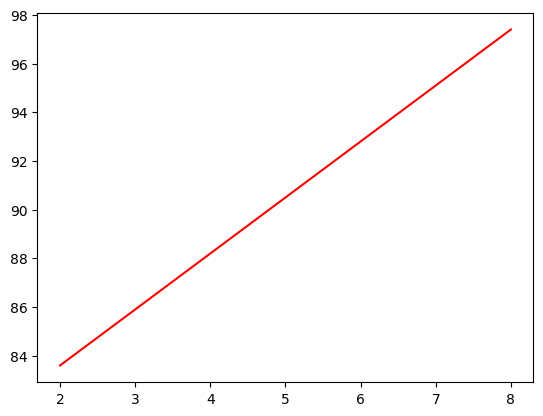

epoch=1800, 기울기=2.3001, 절편=78.9997


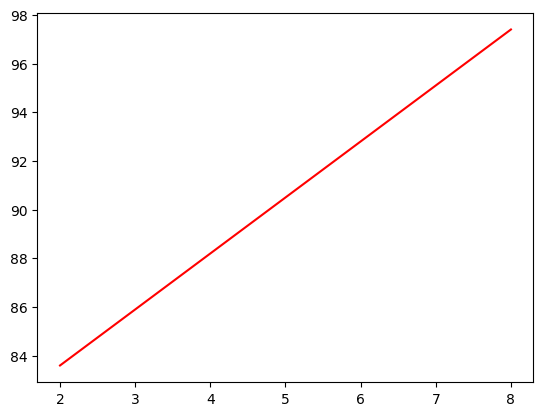

epoch=1900, 기울기=2.3000, 절편=78.9998


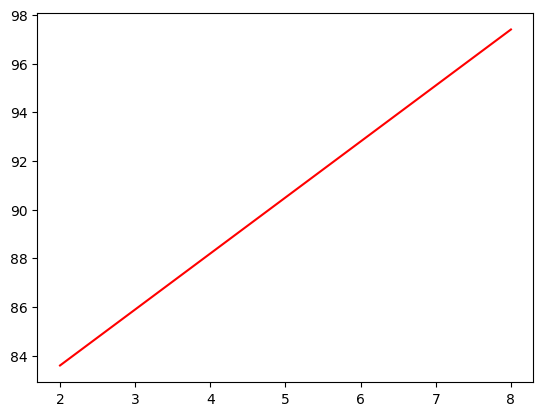

epoch=2000, 기울기=2.3000, 절편=78.9998


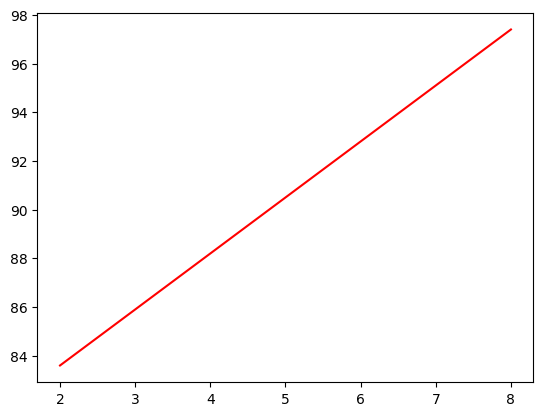

In [80]:
# x 값이 총 몇 개인지 셉니다.
n=len(x)

#경사 하강법을 시작합니다.
for i in range(epochs):                  # epoch 수 만큼 반복

    y_pred = a * x + b                   # 예측 값을 구하는 식입니다.
    error = y - y_pred                   # 실제 값과 비교한 오차를 error로 놓습니다.

    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다.

    a = a - lr * a_diff     # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
        plt.plot(x,y_pred,'r')
        plt.show()
        time.sleep(0.5)

In [74]:
import time

In [81]:
y_pred = a * x + b

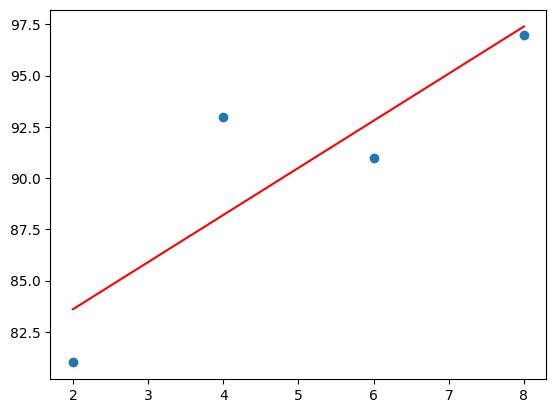

In [82]:
plt.scatter(x, y)
plt.plot(x, y_pred,'r')
plt.show()

In [83]:
x1 = np.array([2, 4, 6, 8])
x2 = np.array([0, 4, 2, 3])
y = np.array([81, 93, 91, 97])

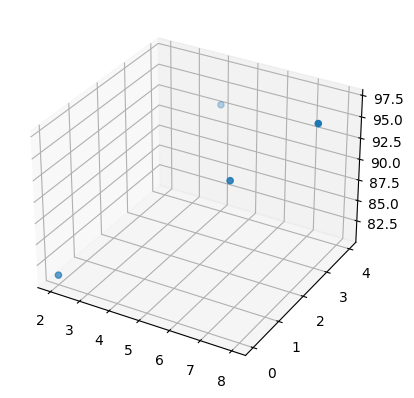

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y)
plt.show()

In [85]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a1 = 0
a2 = 0
b = 0

#학습률을 정합니다.
lr = 0.01

#몇 번 반복될지를 설정합니다.
epochs = 2001

In [86]:
# x 값이 총 몇 개인지 셉니다. x1과 x2의 수가 같으므로 x1만 세겠습니다.
n=len(x1)

#경사 하강법을 시작합니다.
for i in range(epochs):                  # epoch 수 만큼 반복

    y_pred = a1 * x1 + a2 * x2 + b       #예측 값을 구하는 식을 세웁니다
    error = y - y_pred                   #실제 값과 비교한 오차를 error로 놓습니다.

    a1_diff = (2/n) * sum(-x1 * (error)) # 오차함수를 a1로 편미분한 값입니다.
    a2_diff = (2/n) * sum(-x2 * (error)) # 오차함수를 a2로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))       # 오차함수를 b로 편미분한 값입니다.

    a1 = a1 - lr * a1_diff  # 학습률을 곱해 기존의 a1 값을 업데이트합니다.
    a2 = a2 - lr * a2_diff  # 학습률을 곱해 기존의 a2 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a1, a2, b 값을 출력합니다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))

epoch=0, 기울기1=9.2800, 기울기2=4.2250, 절편=1.8100
epoch=100, 기울기1=9.5110, 기울기2=5.0270, 절편=22.9205
epoch=200, 기울기1=7.3238, 기울기2=4.2950, 절편=37.8751
epoch=300, 기울기1=5.7381, 기울기2=3.7489, 절편=48.7589
epoch=400, 기울기1=4.5844, 기울기2=3.3507, 절편=56.6800
epoch=500, 기울기1=3.7447, 기울기2=3.0608, 절편=62.4448
epoch=600, 기울기1=3.1337, 기울기2=2.8498, 절편=66.6404
epoch=700, 기울기1=2.6890, 기울기2=2.6962, 절편=69.6938
epoch=800, 기울기1=2.3653, 기울기2=2.5845, 절편=71.9160
epoch=900, 기울기1=2.1297, 기울기2=2.5032, 절편=73.5333
epoch=1000, 기울기1=1.9583, 기울기2=2.4440, 절편=74.7103
epoch=1100, 기울기1=1.8336, 기울기2=2.4009, 절편=75.5670
epoch=1200, 기울기1=1.7428, 기울기2=2.3695, 절편=76.1904
epoch=1300, 기울기1=1.6767, 기울기2=2.3467, 절편=76.6441
epoch=1400, 기울기1=1.6286, 기울기2=2.3301, 절편=76.9743
epoch=1500, 기울기1=1.5936, 기울기2=2.3180, 절편=77.2146
epoch=1600, 기울기1=1.5681, 기울기2=2.3092, 절편=77.3895
epoch=1700, 기울기1=1.5496, 기울기2=2.3028, 절편=77.5168
epoch=1800, 기울기1=1.5361, 기울기2=2.2982, 절편=77.6095
epoch=1900, 기울기1=1.5263, 기울기2=2.2948, 절편=77.6769
epoch=2000, 기울기1=1.5191, 기울기2=2.2

In [87]:
#w1x1+w2x2+b
#1.5191*x1+2.2923*x2+77.7260
y

array([81, 93, 91, 97])

In [88]:
y_pred

array([80.76387645, 92.97153922, 91.42520875, 96.7558749 ])

In [100]:
#텐서플로의 케라스 API에서 필요한 함수들을 불러 옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [101]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [102]:
model = Sequential()

In [103]:
model.add(Dense(1, input_dim=1, activation='linear'))
#ypred=w*x+b

In [104]:
# 오차 수정을 위해 경사 하강법(sgd)을, 오차의 정도를 판단하기 위해 평균 제곱 오차(mse)를 사용합니다.
model.compile(optimizer='sgd', loss='mse')

In [105]:
# 오차를 최소화하는 과정을 2000번 반복합니다.
model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 266ms/step - loss: 8305.6484
Epoch 2/2000
1/1 [==============================] - 0s 11ms/step - loss: 2051.8867
Epoch 3/2000
1/1 [==============================] - 0s 8ms/step - loss: 1128.0238
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 987.0245
Epoch 5/2000
1/1 [==============================] - 0s 8ms/step - loss: 961.0430
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 951.9888
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 945.4547
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 939.3242
Epoch 9/2000
1/1 [==============================] - 0s 10ms/step - loss: 933.2867
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 927.2961
Epoch 11/2000
1/1 [==============================] - 0s 16ms/step - loss: 921.3454
Epoch 12/2000
1/1 [==============================] - 0s 9ms/step - loss: 915.4333
Epoch 13/2000
1/1

1/1 [==============================] - 0s 64ms/step


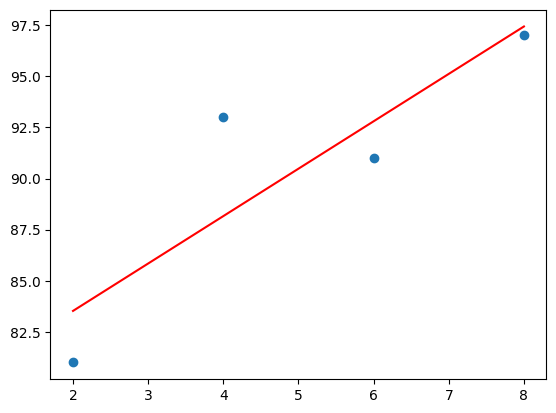

In [106]:
plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')    # 예측 결과를 그래프로 나타냅니다.
plt.show()

In [107]:
model.get_weights()

[array([[2.3193378]], dtype=float32), array([78.8846], dtype=float32)]

In [108]:
model.predict([11])

1/1 [==============================] - 0s 33ms/step


array([[104.397316]], dtype=float32)

In [109]:

x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97])

In [110]:
model = Sequential()

In [111]:
model.add(Dense(1,input_dim=2,activation='linear'))

In [112]:
model.compile(optimizer='sgd' ,loss='mse')

In [113]:
model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 919ms/step - loss: 9099.3604
Epoch 2/2000
1/1 [==============================] - 0s 14ms/step - loss: 1498.9828
Epoch 3/2000
1/1 [==============================] - 0s 15ms/step - loss: 958.9288
Epoch 4/2000
1/1 [==============================] - 0s 24ms/step - loss: 915.4650
Epoch 5/2000
1/1 [==============================] - 0s 29ms/step - loss: 906.9648
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 900.9622
Epoch 7/2000
1/1 [==============================] - 0s 12ms/step - loss: 895.1729
Epoch 8/2000
1/1 [==============================] - 0s 10ms/step - loss: 889.4360
Epoch 9/2000
1/1 [==============================] - 0s 13ms/step - loss: 883.7399
Epoch 10/2000
1/1 [==============================] - 0s 10ms/step - loss: 878.0832
Epoch 11/2000
1/1 [==============================] - 0s 17ms/step - loss: 872.4655
Epoch 12/2000
1/1 [==============================] - 0s 13ms/step - loss: 866.8862
Epoch 13/20

In [114]:
hour = 7
private_class = 4
prediction = model.predict([[hour, private_class]])

print("%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다" % (hour, private_class, prediction))

1/1 [==============================] - 0s 99ms/step
7시간을 공부하고 4시간의 과외를 받을 경우, 예상 점수는 97.53점입니다


<ipython-input-114-951dca87f293>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다" % (hour, private_class, prediction))


In [121]:
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1])

In [122]:
model = Sequential()

In [124]:
model.add(Dense( 1  ,input_dim=1, activation='sigmoid'))

In [125]:
model.compile(optimizer='sgd' ,loss='binary_crossentropy')

In [126]:
model.fit(x, y, epochs=5000)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 14ms/step - loss: 0.2597
Epoch 2502/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.2597
Epoch 2503/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2596
Epoch 2504/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2596
Epoch 2505/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.2595
Epoch 2506/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2595
Epoch 2507/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.2594
Epoch 2508/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2594
Epoch 2509/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.2593
Epoch 2510/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2593
Epoch 2511/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2592
Epoch 2512/5000
1/1 [==============================] - 0s 9ms/step - lo

1/1 [==============================] - 0s 184ms/step


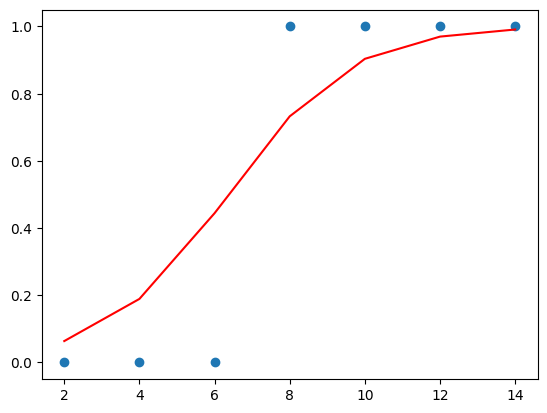

In [127]:
#그래프로 확인해 봅니다.

plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')
plt.show()

In [128]:
#임의의 학습시간을 집어넣어 합격 예상 확률을 예측해 보겠습니다.

hour = 7
prediction = model.predict([hour])

print("%.f시간을 공부할 경우, 합격 예상 확률은 %.01f%%입니다" % (hour, prediction * 100))

1/1 [==============================] - 0s 127ms/step
7시간을 공부할 경우, 합격 예상 확률은 59.7%입니다


<ipython-input-128-5306a1178304>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("%.f시간을 공부할 경우, 합격 예상 확률은 %.01f%%입니다" % (hour, prediction * 100))


In [172]:
pd.read_csv('/content/drive/MyDrive/dl_data/data-01-test-score.csv')
data=np.loadtxt('/content/drive/MyDrive/dl_data/data-01-test-score.csv', delimiter=',')

In [173]:
data

array([[ 80.,  79.,  77., 149.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [174]:
# 90, 90, 90 몇 점?
# 80, 85, 80 몇 점?
# 93, 92, 70 몇 점?
# 텐서플로우, 파이썬
# 2가지 버전

In [177]:
X=data[:,0:3]
y=data[:,3]

In [178]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [193]:
model = Sequential()

In [194]:
model.add(Dense(1, input_dim=3, activation='linear'))

In [195]:
model.compile(optimizer='sgd', loss='mse')

In [198]:
model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 441ms/step - loss: nan
Epoch 2/2000
1/1 [==============================] - 0s 16ms/step - loss: nan
Epoch 3/2000
1/1 [==============================] - 0s 7ms/step - loss: nan
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: nan
Epoch 5/2000
1/1 [==============================] - 0s 10ms/step - loss: nan
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: nan
Epoch 7/2000
1/1 [==============================] - 0s 8ms/step - loss: nan
Epoch 8/2000
1/1 [==============================] - 0s 10ms/step - loss: nan
Epoch 9/2000
1/1 [==============================] - 0s 13ms/step - loss: nan
Epoch 10/2000
1/1 [==============================] - 0s 13ms/step - loss: nan
Epoch 11/2000
1/1 [==============================] - 0s 12ms/step - loss: nan
Epoch 12/2000
1/1 [==============================] - 0s 6ms/step - loss: nan
Epoch 13/2000
1/1 [==============================] - 0s 6ms/step - loss: nan


KeyboardInterrupt: 

In [200]:
model.predict([[90, 90, 90]])

1/1 [==============================] - 0s 72ms/step


array([[156.30064]], dtype=float32)

In [197]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.001), loss='mse')

In [188]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [199]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# 데이터 로드
data = np.loadtxt('/content/drive/MyDrive/dl_data/data-01-test-score.csv', delimiter=',')

# 데이터 확인
print(data)

# NaN 또는 무한대 값 확인
print("NaN in data:", np.isnan(data).any())
print("Inf in data:", np.isinf(data).any())

# NaN 또는 무한대 값이 있는 경우, 이를 처리합니다 (예: NaN을 평균값으로 대체)
data = np.nan_to_num(data, nan=np.nanmean(data))

# X와 y로 데이터 분리
X = data[:, 0:3]
y = data[:, 3]

# 데이터 스케일링 (표준화)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 모델 구성
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# 모델 컴파일
model.compile(optimizer='sgd', loss='mse')

# 모델 요약
model.summary()

# 학습률 조정
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.001), loss='mse')

# 모델 훈련
model.fit(X, y, epochs=2000)

# 예측 및 평가
predictions = model.predict(X)
print(predictions)

[[ 80.  79.  77. 149.]
 [ 93.  88.  93. 185.]
 [ 89.  91.  90. 180.]
 [ 96.  98. 100. 196.]
 [ 73.  66.  70. 142.]
 [ 53.  46.  55. 101.]
 [ 69.  74.  77. 149.]
 [ 47.  56.  60. 115.]
 [ 87.  79.  90. 175.]
 [ 79.  70.  88. 164.]
 [ 69.  70.  73. 141.]
 [ 70.  65.  74. 141.]
 [ 93.  95.  91. 184.]
 [ 79.  80.  73. 152.]
 [ 70.  73.  78. 148.]
 [ 93.  89.  96. 192.]
 [ 78.  75.  68. 147.]
 [ 81.  90.  93. 183.]
 [ 88.  92.  86. 177.]
 [ 78.  83.  77. 159.]
 [ 82.  86.  90. 177.]
 [ 86.  82.  89. 175.]
 [ 78.  83.  85. 175.]
 [ 76.  83.  71. 149.]
 [ 96.  93.  95. 192.]]
NaN in data: False
Inf in data: False
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                256       
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                 